In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
import requests
import pandas as pd
import numpy as np
import csv
import urllib.request
from bs4 import BeautifulSoup

In [3]:
import random
file_path = '/content/drive/My Drive/data_scrap_oyunerdene/car1.tsv'
with open(file_path, 'r', encoding='utf-8') as f:
    app_lines = f.read().split('\n')

In [4]:
df = pd.read_csv('/content/drive/My Drive/data_scrap_oyunerdene/car1.tsv' , sep='\t')


In [5]:
len(df)

360

In [6]:
df.head(10)

,une,motor,hurdnii_hairtsag,hurd,turul,ungu,uild_on,orj_on,hudulguur,dotor_ungu,leasing,hutlugchn,kilo,nuhtsul,haalga
0,480.0,4.0,Автомат,Зөв,Жийп,Боронзон,2021,2021,Бензин,Хар,Лизинггүй,Бүх дугуй 4WD,50000,Дугаар авсан,5
1,45.0,3.2,Автомат,Зөв,Суудлын тэрэг,Хар,1994,2024,Бензин,Хар,Лизинггүй,Хойноо RWD,200000,Дугаар аваагүй,5
2,65.0,5.0,Автомат,Зөв,Жийп,Хар,2002,2012,Бензин,Хар,Лизинггүй,Бүх дугуй 4WD,100000,Дугаар авсан,5
3,45.0,3.3,Автомат,Зөв,Суудлын тэрэг,Цагаан,2014,2018,Бензин,Хар,Лизинггүй,Бүх дугуй 4WD,160000,Дугаар авсан,4
4,47.0,1.6,Автомат,Буруу,Суудлын тэрэг,Хар,2018,2020,Бензин,Хар,Лизинггүй,Урдаа FWD,29000,Дугаар авсан,5
5,150.0,2.0,Автомат,Буруу,Гэр бүлийн,Бусад,2016,2023,Дизель,Бусад,Лизинггүй,Бүх дугуй 4WD,135000,Дугаар авсан,4
6,29.9,1.6,Автомат,Буруу,Суудлын тэрэг,Бор,2013,2023,Бензин,Хар,Лизинггүй,Урдаа FWD,136000,Дугаар авсан,5
7,95.0,5.5,Автомат,Зөв,Жийп,Хүрэн,2009,2009,Бензин,Бусад,ББСБ лизингтэй,Бүх дугуй 4WD,1500000,Дугаар авсан,4
8,85.0,0.6,Автомат,Буруу,Жийп,Цайвар цэнхэр,2017,2022,Бензин,Хар,Лизинггүй,Бүх дугуй 4WD,10000,Дугаар авсан,5
9,160.0,3.0,Автомат,Зөв,Суудлын тэрэг,Хар,2016,2024,Бензин,Хар,Банкны лизингтэй,Бүх дугуй 4WD,77000,Дугаар аваагүй,4


In [7]:
filtered_df = df[df.hudulguur == 'Бензин']

print(len(df),len(filtered_df))

for index, row in filtered_df.iterrows():
  if ('Автомат' in row['hurdnii_hairtsag']) is False:
    print(row)


360 336


In [8]:
import pandas as pd

def normalizeDataSet(app_set):
  ret = pd.DataFrame(columns=["une ","motor",'hurdnii_hairtsag','hurd','turul','ungu','uild_on', 'orj_on', 'hudulguur', 'dotor_ungu', 'leasing', 'hutlugchn', 'kilo', 'nuhtsul', 'haalga'])
  for index, row in app_set.iterrows():


    #print(float(row['space']))
    if row['leasing'].strip()=='Лизинггүй':
      leas = False
    else:
      leas = True

    ret = ret.append({'une':row['une'] , 'motor': row['motor'],'hurdnii_hairtsag': row['hurdnii_hairtsag'], 'hurd': row['hurd'], 'turul' : row['turul'],
                  'ungu': row['ungu'],'uild_on': row['uild_on'], 'orj_on': row['orj_on'],'hudulguur': row['hudulguur'],'dotor_ungu': row['dotor_ungu'], 'leasing': row['leasing'],
                  'hutlugchn': row['hutlugchn'], 'kilo': row['kilo'],'nuhtsul': row['nuhtsul'], 'haalga': row['haalga']}, ignore_index=True)
  return ret

In [9]:
print(filtered_df.columns)

Index(['une', 'motor', 'hurdnii_hairtsag', 'hurd', 'turul', 'ungu', 'uild_on',
       'orj_on', 'hudulguur', 'dotor_ungu', 'leasing', 'hutlugchn', 'kilo',
       'nuhtsul', 'haalga'],
      dtype='object')


In [14]:
for col in app_df.columns:
    if col not in filtered_df.columns:
        print(f"Column '{col}' not found in filtered_df")

In [12]:
app_df = pd.DataFrame(columns=['une', 'motor', 'hurdnii_hairtsag', 'hurd', 'turul', 'ungu', 'uild_on', 'orj_on', 'hudulguur', 'dotor_ungu', 'leasing', 'hutlugchn', 'kilo', 'nuhtsul', 'haalga'])

for index, row in filtered_df.iterrows():
    app_df.loc[index] = {'une': row['une'], 'motor': row['motor'], 'hurdnii_hairtsag': row['hurdnii_hairtsag'], 'hurd': row['hurd'], 'turul': row['turul'],
                       'ungu': row['ungu'], 'uild_on': row['uild_on'], 'orj_on': row['orj_on'], 'hudulguur': row['hudulguur'], 'dotor_ungu': row['dotor_ungu'], 'leasing': row['leasing'],
                       'hutlugchn': row['hutlugchn'], 'kilo': row['kilo'], 'nuhtsul': row['nuhtsul'], 'haalga': row['haalga']}

In [13]:
app_df = pd.DataFrame(columns=filtered_df.columns)

for index, row in filtered_df.iterrows():
    app_df.loc[index] = row

In [15]:
len(app_df)

336

In [16]:
app_df.to_csv('data.csv')

In [17]:
app_df.head()

,une,motor,hurdnii_hairtsag,hurd,turul,ungu,uild_on,orj_on,hudulguur,dotor_ungu,leasing,hutlugchn,kilo,nuhtsul,haalga
0,480.0,4.0,Автомат,Зөв,Жийп,Боронзон,2021,2021,Бензин,Хар,Лизинггүй,Бүх дугуй 4WD,50000,Дугаар авсан,5
1,45.0,3.2,Автомат,Зөв,Суудлын тэрэг,Хар,1994,2024,Бензин,Хар,Лизинггүй,Хойноо RWD,200000,Дугаар аваагүй,5
2,65.0,5.0,Автомат,Зөв,Жийп,Хар,2002,2012,Бензин,Хар,Лизинггүй,Бүх дугуй 4WD,100000,Дугаар авсан,5
3,45.0,3.3,Автомат,Зөв,Суудлын тэрэг,Цагаан,2014,2018,Бензин,Хар,Лизинггүй,Бүх дугуй 4WD,160000,Дугаар авсан,4
4,47.0,1.6,Автомат,Буруу,Суудлын тэрэг,Хар,2018,2020,Бензин,Хар,Лизинггүй,Урдаа FWD,29000,Дугаар авсан,5


<Axes: xlabel='uild_on', ylabel='une'>

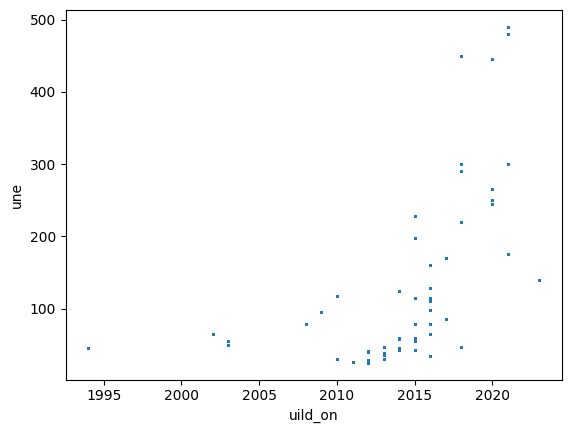

In [18]:
app_df.plot.scatter(x = 'uild_on', y = 'une', s = 1)

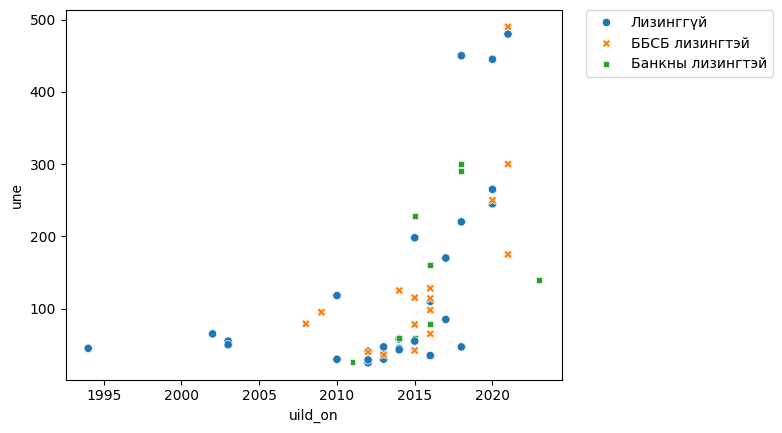

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=app_df, x="uild_on", y="une", hue="leasing",style="leasing")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

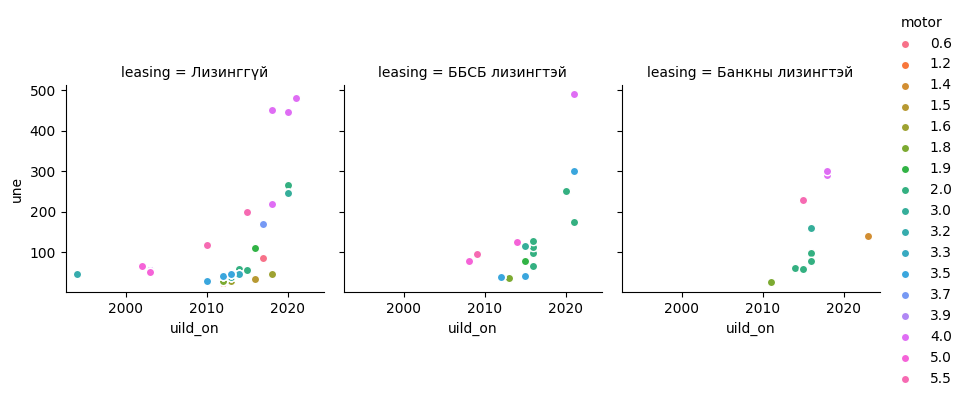

In [20]:
graph = sns.FacetGrid(app_df, col ="leasing",  hue ="motor")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "uild_on", "une", edgecolor ="w").add_legend()
# show the object
plt.show()

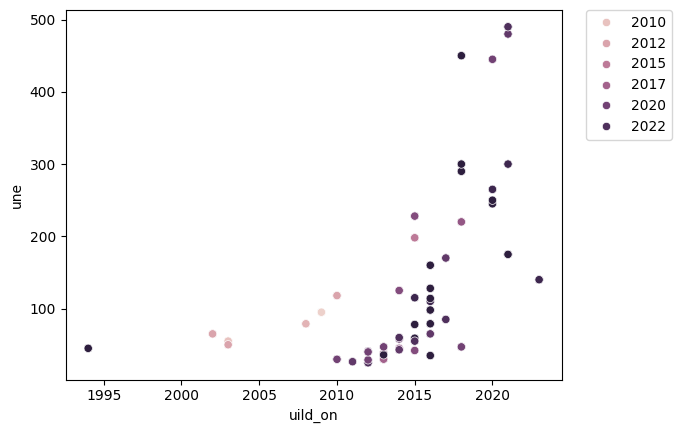

In [46]:
sns.scatterplot(data=app_df, x="uild_on", y="une", hue="orj_on")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Axes: xlabel='orj_on', ylabel='une'>

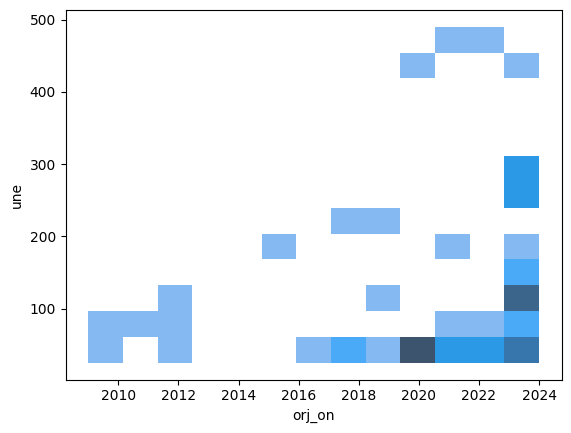

In [48]:
sns.histplot(data=app_df, y="une", x="orj_on")

<ipython-input-23-2178c2ded6b9>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=app_df, x="une", hue="orj_on", kind='kde')


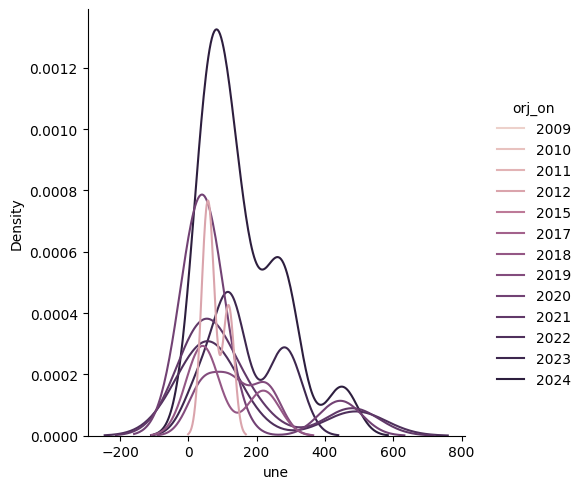

In [23]:
sns.displot(data=app_df, x="une", hue="orj_on", kind='kde')

In [24]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [25]:
from sentence_transformers import SentenceTransformer
sen_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [30]:
sentences = []
y = []
z = []
for index, row in app_df.iterrows():
  sentences.append(row['turul']+' '+row['hutlugchn'])
  z.append(row['une'])
  y.append(row['orj_on'])

In [31]:
sentence_vectors = sen_model.encode(sentences)

In [32]:
it = 0
x_ = []
for i in range(len(sentence_vectors)):
  B = np.array([z[it]])
  # B 1 x 1
  # Concat sentence vector with m2 value
  O = np.append(sentence_vectors[i], B)
  # O 1 x 100 + 1 x 1 = 1 x 101
  x_.append(O)
  it+=1

# x_ 5000 x 101
# y  5000 x 1

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x_, y)

LinearRegression()

In [41]:
def extractSpace(sentence):
  ans = int(sum(z)/len(z))
  if 'Суудлын тэрэг' in sentence or 'Жиип' in sentence:
    sentence = sentence.replace('Суудлын тэрэг','Жиип')
    sentence = sentence.replace('Жиип','Жиип')
    tokens = sentence.split(' ')
    for token in tokens:
      if token.endswith(' ') and len(token) > 2:
          ans = int(token[:len(token)-2])
          return ans
  return ans

def predictEstimate(sentence):
  p_embeddings = sen_model.encode([sentence])
  d = [extractSpace(sentence)]
  p_ = []
  for emb in p_embeddings:
    B = [d[0]]
    p_.append(np.append( emb , B ))
  y_prediction =  model.predict(p_)
  return y_prediction[0]

In [43]:
print(predictEstimate(" Жиип 2015 Бүх дугуй 4WD"))


171754.76138329564
